# Segmentação de Imagens

In [1]:
import cv2
import glob
from pathlib import Path
import os
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Markdown
from ntpath import join

In [2]:
def open_img(image_path):
    """
            Funcao responsavel por carregar imagens de um diretorio
            Arguments:
              image_path: Caminho do diretorio das imagens
            Return:
              dataset: Vetor, onde cada posição possui uma imagem carregada do diretório
        """
    dataset = []
    #carrega as imagens do diretorio
    for i in glob.glob(image_path + '/*.png', recursive=True):
        dataset.append(cv2.cvtColor(cv2.imread(i), cv2.COLOR_BGR2RGB))
    for j in glob.glob(image_path + '/*.jpg', recursive=True):
        dataset.append(cv2.cvtColor(cv2.imread(j), cv2.COLOR_BGR2RGB))

    return dataset

def show(pos,image,title):
  plt.subplot(pos)
  plt.imshow(image,cmap='gray')
  plt.title(title)
  plt.axis('off')

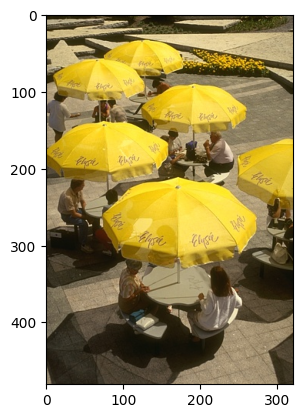

In [3]:
dataset = open_img('imagens')
image = dataset[0].copy()
plt.imshow(image,cmap='gray')

## Kmeans

C:\Users\stefane.santos\AppData\Local\Temp\ipykernel_14012\772765431.py:19: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(pos)


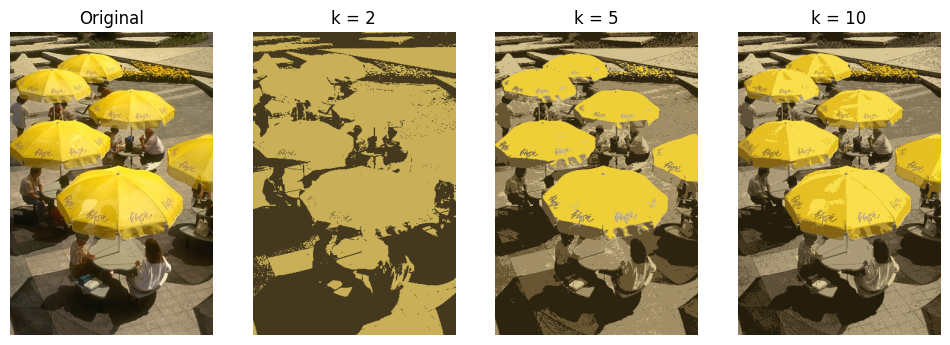

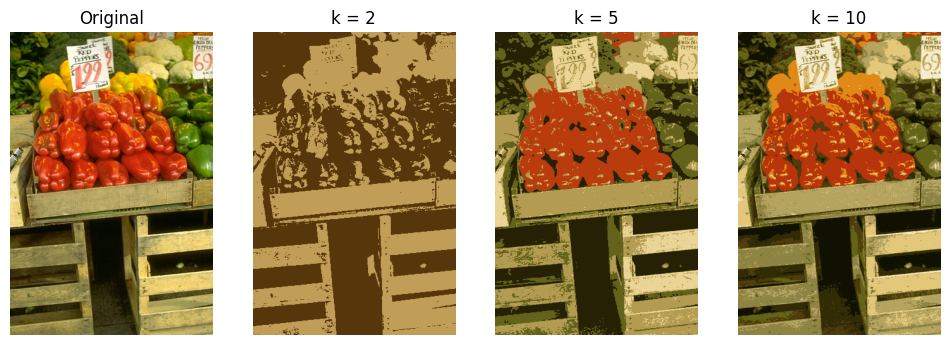

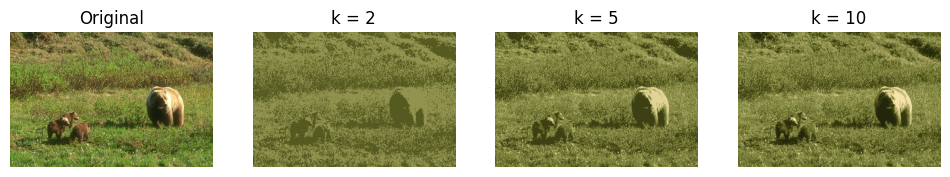

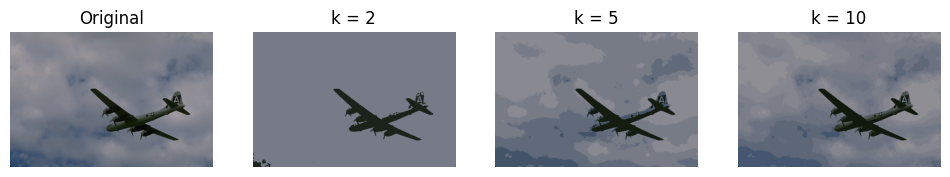

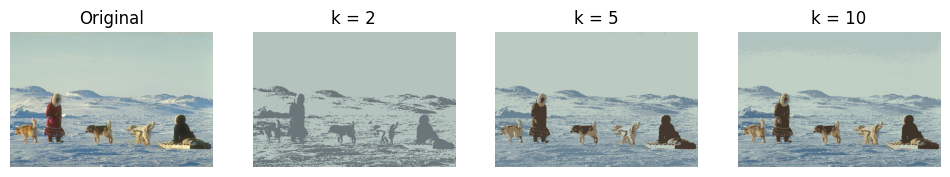

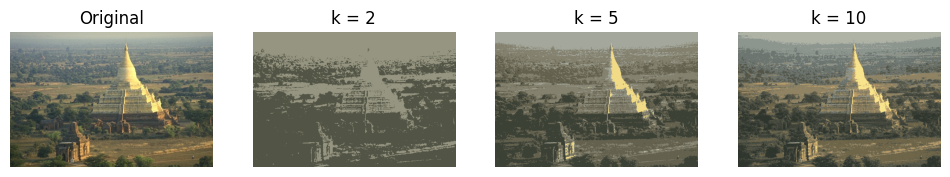

In [4]:
def kmeans(image,K):
    Z = image.reshape((-1,3))
    shape = image.shape
    Z = np.float32(Z)
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
    ret,label,center=cv2.kmeans(Z,K,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)
    center = np.uint8(center)
    image = center[label.flatten()]
    image = image.reshape((shape))
    
    return image

def kmeans_show(image):
   plt.figure(figsize=(12,8))
   plt.axis('off')

   show(141,image,'Original')
   show(142,kmeans(image,2),'k = 2')
   show(143,kmeans(image,5),'k = 5')
   show(144,kmeans(image,10),'k = 10')

for image in dataset: kmeans_show(image)

## Otsu

C:\Users\stefane.santos\AppData\Local\Temp\ipykernel_14012\772765431.py:19: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(pos)


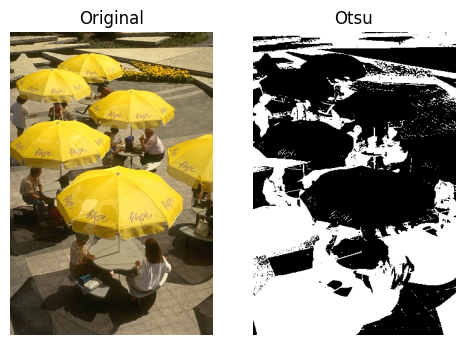

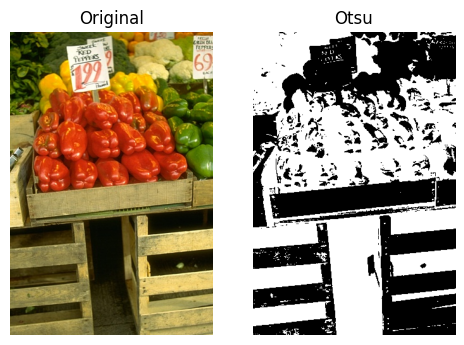

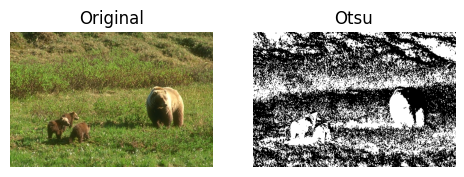

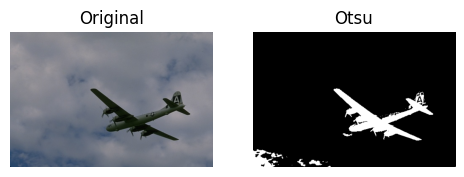

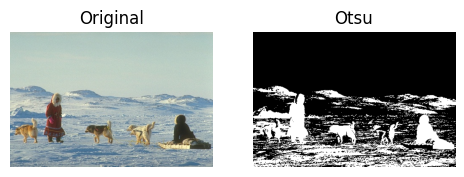

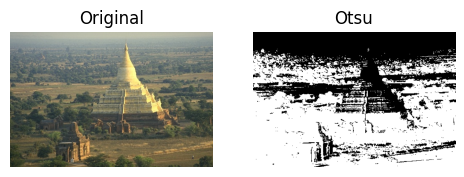

In [5]:
def otsu(image):
    image_gray = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)
    thresh = cv2.threshold(image_gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)[1]
    return thresh

def otsu_show(image):
   plt.figure(figsize=(12,8))
   plt.axis('off')

   show(141,image,'Original')
   show(142,otsu(image),'Otsu')

for image in dataset: otsu_show(image)


## Watershed

C:\Users\stefane.santos\AppData\Local\Temp\ipykernel_14012\772765431.py:19: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(pos)


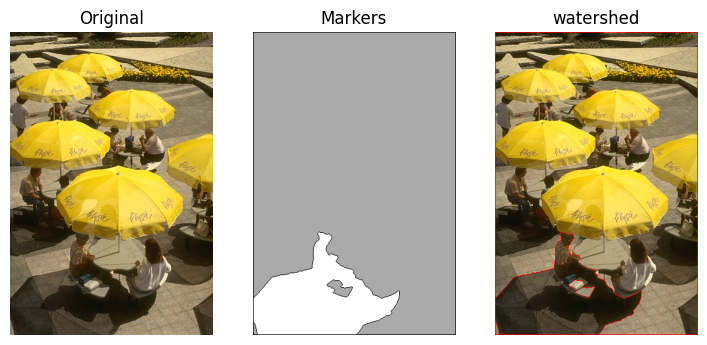

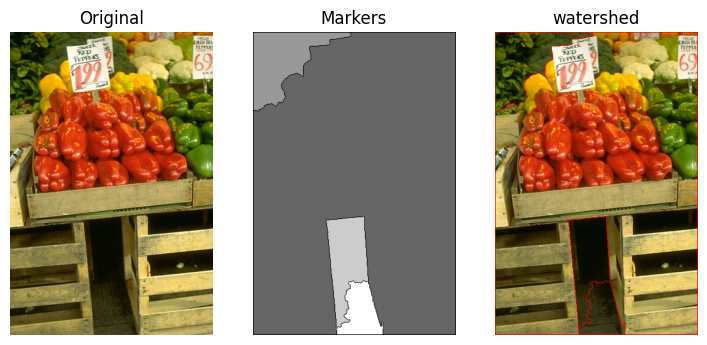

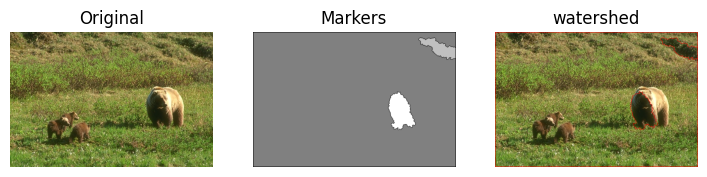

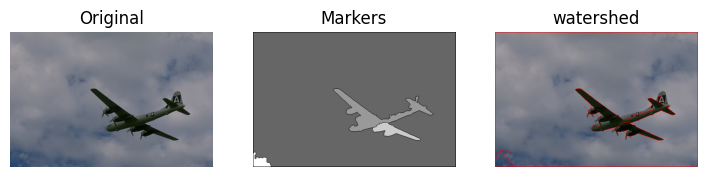

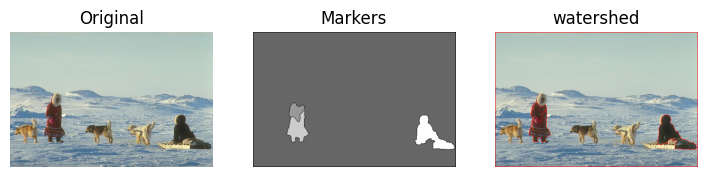

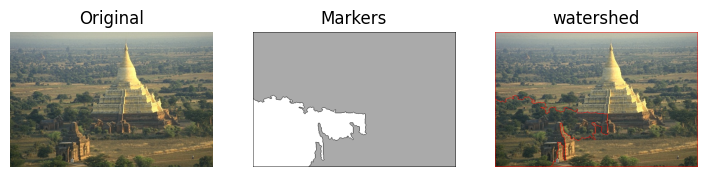

In [6]:
def watershed(image): 
    image_gray = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)
    thresh = cv2.threshold(image_gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)[1]

    # aplica abertura 
    kernel = np.ones((3,3),np.uint8)
    image_open = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)

    # dilata a imagem
    image_dilate = cv2.dilate(image_open,kernel,iterations=3)

    # encontra a area
    dist_transform = cv2.distanceTransform(image_open,cv2.DIST_L2,5)
    imagebinary = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)[1]

    # encontra a região
    imagebinary = np.uint8(imagebinary)
    unknown = cv2.subtract(image_dilate,imagebinary)
    markers = cv2.connectedComponents(imagebinary)[1]

    markers = markers+1
    markers[unknown==255] = 0

    markers = cv2.watershed(image,markers)
    image[markers == -1] = [255,0,0]
    return image, markers

def watershed_show(image):
   plt.figure(figsize=(12,8))
   plt.axis('off')

   show(141,image,'Original')
   show(142,watershed(image)[1],'Markers')
   show(143,watershed(image)[0],'watershed')

for image in dataset: watershed_show(image)

